In [1]:
%matplotlib notebook
import scimple as scm
import numpy as np
import pandas as pd
adult = scm.get_sample('adults')
#{0: 'age', 1: 'work class', 2: 'fnlwgt', 3: 'education', 4: 'education-num', 5: 'marital-status', 6: 'occupation', 7: 'relationship', 8: 'race', 9: 'sex', 10: 'capital-gain', 11: 'capital-loss', 12: 'hours-per-week', 13: 'native-country', 14: 'salary'}
df = spark.createDataFrame(adult[1:], list(adult[0]))

In [26]:
rdd = df.rdd
rdd.collect()

[Row(age=50, work class='Self-emp-not-inc', fnlwgt=83311, education='Bachelors', education-num=13, marital-status='Married-civ-spouse', occupation='Exec-managerial', relationship='Husband', race='White', sex='Male', capital-gain=0, capital-loss=0, hours-per-week=13, native-country='United-States', salary='<=50K'),
 Row(age=38, work class='Private', fnlwgt=215646, education='HS-grad', education-num=9, marital-status='Divorced', occupation='Handlers-cleaners', relationship='Not-in-family', race='White', sex='Male', capital-gain=0, capital-loss=0, hours-per-week=40, native-country='United-States', salary='<=50K'),
 Row(age=53, work class='Private', fnlwgt=234721, education='11th', education-num=7, marital-status='Married-civ-spouse', occupation='Handlers-cleaners', relationship='Husband', race='Black', sex='Male', capital-gain=0, capital-loss=0, hours-per-week=40, native-country='United-States', salary='<=50K'),
 Row(age=28, work class='Private', fnlwgt=338409, education='Bachelors', educ

In [2]:
df.show()

+---+----------------+------+------------+-------------+--------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
|age|      work class|fnlwgt|   education|education-num|      marital-status|       occupation| relationship|              race|   sex|capital-gain|capital-loss|hours-per-week|native-country|salary|
+---+----------------+------+------------+-------------+--------------------+-----------------+-------------+------------------+------+------------+------------+--------------+--------------+------+
| 50|Self-emp-not-inc| 83311|   Bachelors|           13|  Married-civ-spouse|  Exec-managerial|      Husband|             White|  Male|           0|           0|            13| United-States| <=50K|
| 38|         Private|215646|     HS-grad|            9|            Divorced|Handlers-cleaners|Not-in-family|             White|  Male|           0|           0|            40| United-States| <=50K|
| 53|

In [3]:
#res = df.rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()
res_wm = df[df['race'] == 'White'][df['sex'] == 'Male'].rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()
res_bm = df[df['race'] == 'Black'][df['sex'] == 'Male'].rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()
res_wf = df[df['race'] == 'White'][df['sex'] == 'Female'].rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()
res_bf = df[df['race'] == 'Black'][df['sex'] == 'Female'].rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()

In [5]:
res_wm = [scm.flatten_n_times(1,elem) for elem in res_wm]
res_bm = [scm.flatten_n_times(1,elem) for elem in res_bm]
res_wf = [scm.flatten_n_times(1,elem) for elem in res_wf]
res_bf = [scm.flatten_n_times(1,elem) for elem in res_bf]
res_wm

[[52, 314, 14149],
 [32, 512, 22992],
 [40, 468, 20946],
 [56, 234, 10077],
 [48, 339, 15468],
 [24, 424, 17291],
 [36, 545, 25006],
 [76, 30, 699],
 [44, 453, 20887],
 [20, 344, 12105],
 [64, 130, 4733],
 [28, 470, 20629],
 [80, 17, 418],
 [60, 210, 8797],
 [72, 39, 1081],
 [68, 74, 2459],
 [88, 2, 80],
 [84, 5, 156],
 [25, 460, 19246],
 [49, 370, 16812],
 [45, 444, 20173],
 [21, 344, 12739],
 [53, 283, 12776],
 [41, 508, 22736],
 [29, 457, 20022],
 [33, 526, 23528],
 [57, 227, 10008],
 [37, 567, 25949],
 [61, 198, 7703],
 [17, 187, 4203],
 [65, 113, 4091],
 [77, 18, 443],
 [73, 39, 1174],
 [81, 11, 298],
 [69, 72, 2241],
 [85, 2, 38],
 [50, 406, 18484],
 [38, 532, 24653],
 [42, 489, 22066],
 [30, 508, 22490],
 [46, 442, 19640],
 [18, 247, 6620],
 [34, 542, 24660],
 [22, 366, 13624],
 [70, 56, 1791],
 [58, 233, 9974],
 [54, 278, 12339],
 [66, 91, 3114],
 [26, 418, 17827],
 [62, 154, 6255],
 [90, 22, 912],
 [74, 28, 721],
 [78, 14, 373],
 [82, 9, 180],
 [43, 479, 21455],
 [19, 322, 106

<IPython.core.display.Javascript object>


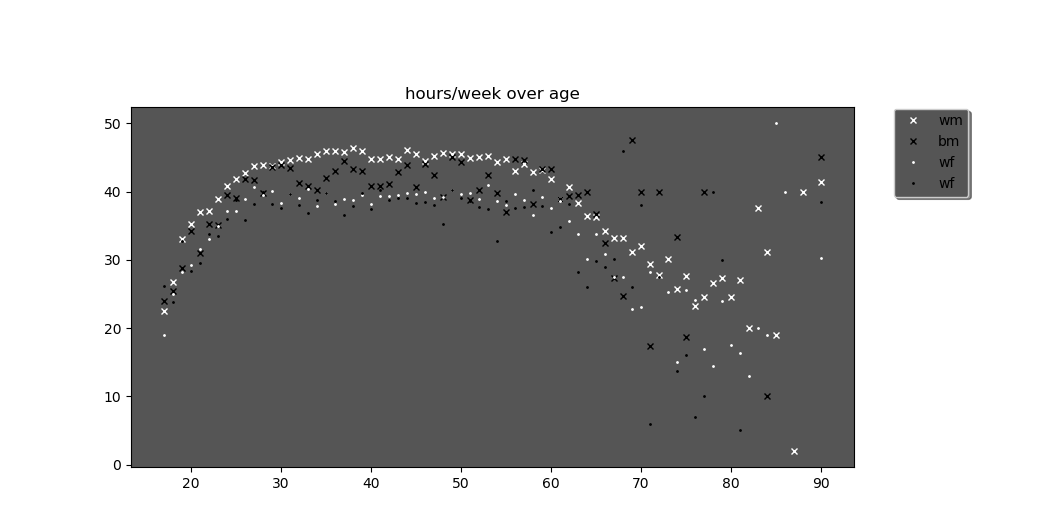

In [6]:
scm.Plot(2, bg_color='#555555', title="hours/week over age")\
.add(res_wm, 0, lambda i, y:res_wm[i][2]/res_wm[i][1], marker='x', markersize=4, colored_by='#ffffff', label='wm')\
.add(res_bm, 0, lambda i, y:res_bm[i][2]/res_bm[i][1], marker='x', markersize=4, colored_by='#000000', label='bm')\
.add(res_wf, 0, lambda i, y:res_wf[i][2]/res_wf[i][1], marker='.', markersize=2, colored_by='#ffffff', label='wf')\
.add(res_bf, 0, lambda i, y:res_bf[i][2]/res_bf[i][1], marker='.', markersize=2, colored_by='#000000', label='wf')
#.add(res, 0, lambda i, y:res[i][2]/res[i][1], marker='.')\

In [14]:
#res = df.rdd.map(lambda line:(line['age'], [1, line['hours-per-week']])).reduceByKey(lambda h1, h2: [h1[0]+h2[0],h1[1]+h2[1]]).collect()
res_wm = df[df['race'] == 'White'][df['sex'] == 'Male']
res_wm_count = res_wm.count()
res_wm = res_wm.rdd.map(lambda line:(line['education'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()

res_bm = df[df['race'] == 'Black'][df['sex'] == 'Male']
res_bm_count = res_bm.count()
res_bm = res_bm.rdd.map(lambda line:(line['education'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()


res_wf = df[df['race'] == 'White'][df['sex'] == 'Female']
res_wf_count = res_wf.count()
res_wf = res_wf.rdd.map(lambda line:(line['education'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()

res_bf = df[df['race'] == 'Black'][df['sex'] == 'Female']
res_bf_count = res_bf.count()
res_bf = res_bf.rdd.map(lambda line:(line['education'], 1)).reduceByKey(lambda n1,n2: n1+n2).collect()
res_bf

[('Bachelors', 165),
 ('HS-grad', 569),
 ('Assoc-voc', 68),
 ('11th', 82),
 ('Doctorate', 4),
 ('9th', 32),
 ('7th-8th', 28),
 ('12th', 26),
 ('Some-college', 399),
 ('Assoc-acdm', 58),
 ('10th', 64),
 ('5th-6th', 8),
 ('1st-4th', 8),
 ('Prof-school', 5),
 ('Masters', 38),
 ('Preschool', 1)]

In [15]:
labels = [elem[0] for elem in res_bf]
labels

['Bachelors',
 'HS-grad',
 'Assoc-voc',
 '11th',
 'Doctorate',
 '9th',
 '7th-8th',
 '12th',
 'Some-college',
 'Assoc-acdm',
 '10th',
 '5th-6th',
 '1st-4th',
 'Prof-school',
 'Masters',
 'Preschool']

In [17]:
print(len(scm.flatten_n_times(1, [[educ]*len(np.arange(0,0.4,0.01)) for educ in labels])))
print(len(scm.flatten_n_times(1, len(labels)*[np.arange(0,0.4,0.01)])))
scm.flatten_n_times(1, len(labels)*[np.arange(0,0.4,0.01)])

640
640


[0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35000000000000003,
 0.36,
 0.37,
 0.38,
 0.39,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35000000000000003,
 0.36,
 0.37,
 0.38,
 0.39,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.23,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35000000000000003,
 0.36,
 0.37,
 0.38,
 0.39,
 0.0,
 0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.

<IPython.core.display.Javascript object>


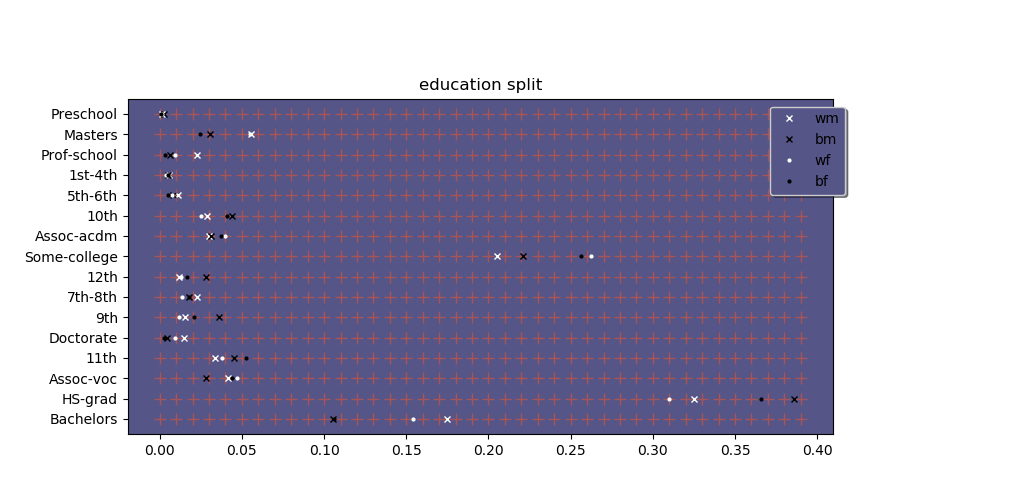

In [23]:
scm.Plot(2, bg_color='#555588', title="education split")\
.add(y=scm.flatten_n_times(1, [[educ]*len(np.arange(0,0.4,0.01)) for educ in labels]),
    x=scm.flatten_n_times(1, len(labels)*[np.arange(0,0.4,0.01)]), marker='+', colored_by='#aa5555')\
.add(res_wm, [res_wm[i][1]/res_wm_count for i in range(len(res_wm))], 0, marker='x', markersize=4, colored_by='#ffffff', label='wm')\
.add(res_bm, [res_bm[i][1]/res_bm_count for i in range(len(res_bm))], 0, marker='x', markersize=4, colored_by='#000000', label='bm')\
.add(res_wf, [res_wf[i][1]/res_wf_count for i in range(len(res_wf))], 0, marker='.', markersize=4, colored_by='#ffffff', label='wf')\
.add(res_bf, [res_bf[i][1]/res_bf_count for i in range(len(res_bf))], 0, marker='.', markersize=4, colored_by='#000000', label='bf')


    tab = get_sample('xyz', pd.DataFrame)
    tab.columns = ['atom', 'x', 'y', 'z']
    charges = get_sample('charges')
    Plot(2, title=':)').add(x=range(100), y=lambda i, x: 50 * math.sin(x / 10),
                            marker='.', colored_by=lambda i, xy: xy[1][i], label='du noir au blanc')         .add(x=range(100), y=lambda i, x: 50 * math.sin(x / 10) - 100,
             marker='.', colored_by='#ff00ff', label='rose')         .add(x=range(100), y=lambda i, x: 50 * math.sin(x / 10) - 200,
             marker='.', colored_by=lambda i, xy: xy[1][i], label='du jaune au rouge')         .add(x=range(100), y=lambda i, x: 50 * math.sin(x / 10) - 300,
             marker='x', colored_by=lambda i, xy: ['#ff0000', '#00ff00', '#0000ff'][int(xy[1][i]) % 3],
             label={'#ff0000': 'rouge', '#00ff00': 'vert', '#0000ff': 'bleu'})         .add(x=range(100), y=lambda i, x: 50 * math.sin(x / 10) - 400,
             marker='.', markersize=3,
             colored_by=lambda i, xy: '>-400

<IPython.core.display.Javascript object>


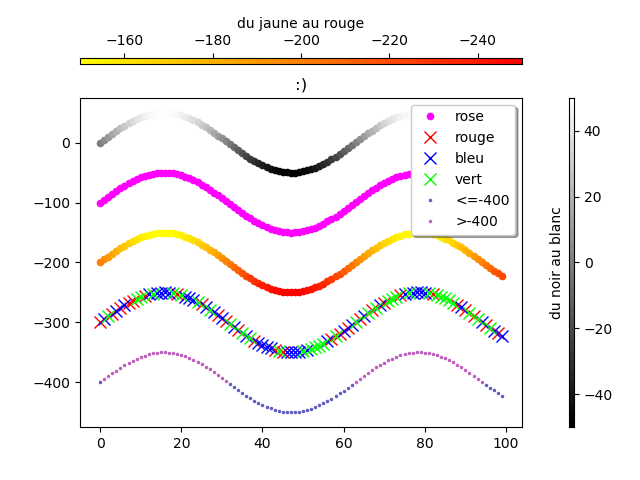

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


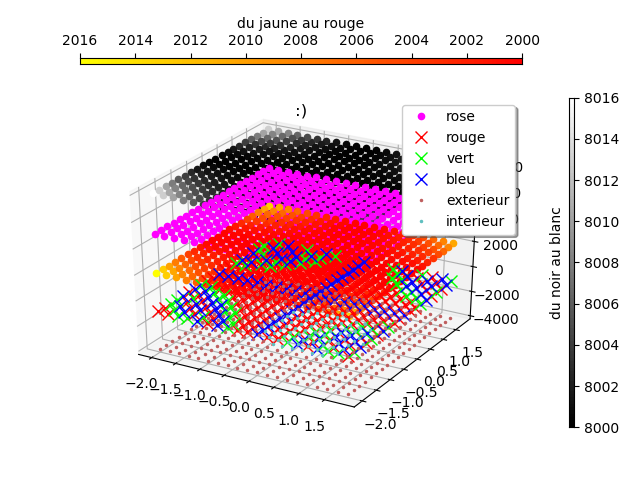

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


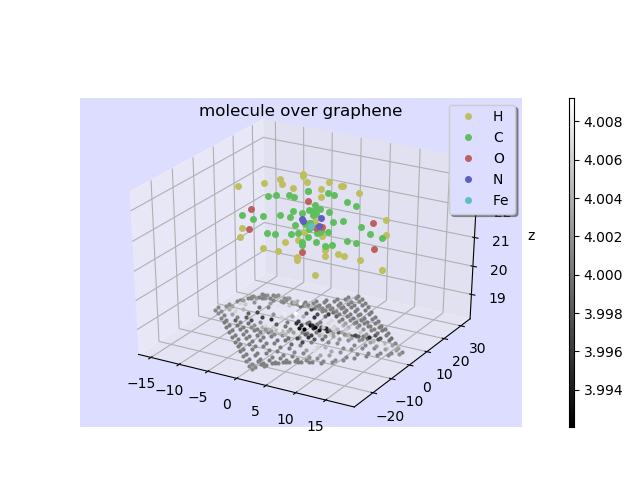

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


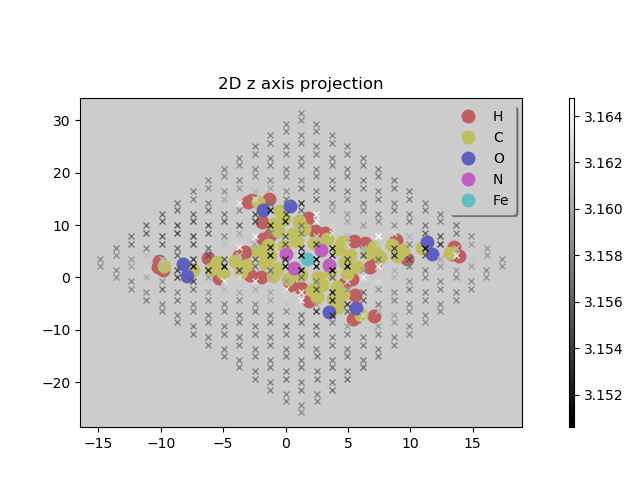

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


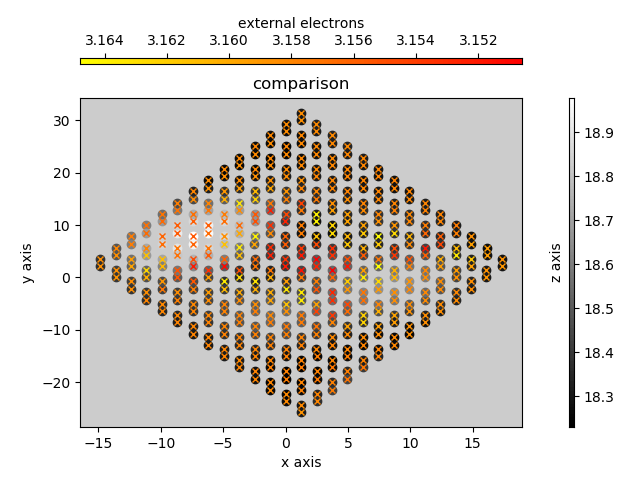

No handles with labels found to put in legend.
No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


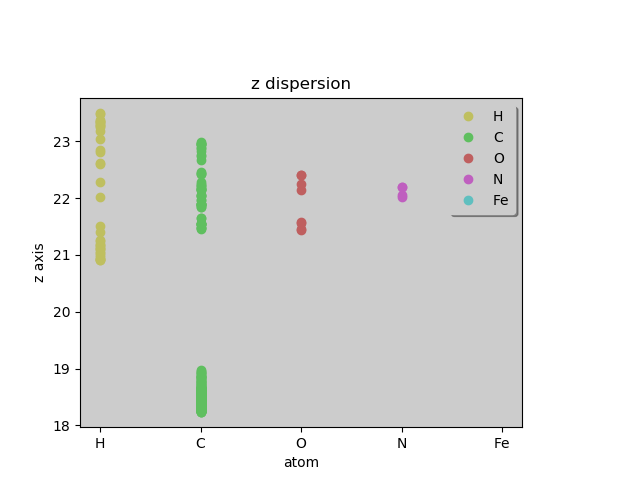

In [27]:
scm.run_example()